Load the wigxjpf library and set the MAXSPIN we want to reach in our computations

In [1]:
import pywigxjpf as wig
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,7.5)

In [2]:
MAXSPIN = 100

In [3]:
def tet_volume(jj1,jj2,jj3,jj4,jj5,jj6):
    return 1/8 * 1/12*np.sqrt(-jj1**2 *jj2**2 *jj4**2 + jj1**2 *jj3**2 *jj4**2 + jj2**2 *jj3**2 *jj4**2 - jj3**4 *jj4**2 - jj3**2 *jj4**4 + jj1**2 *jj2**2 *jj5**2 - jj2**4 *jj5**2 - jj1**2*jj3**2*jj5**2 + jj2**2*jj3**2*jj5**2 + jj2**2*jj4**2*jj5**2 + jj3**2*jj4**2*jj5**2 - jj2**2*jj5**4 - jj1**4*jj6**2 + jj1**2*jj2**2*jj6**2 + jj1**2*jj3**2*jj6**2 - jj2**2*jj3**2*jj6**2 + jj1**2*jj4**2*jj6**2 + jj3**2*jj4**2*jj6**2 + jj1**2*jj5**2*jj6**2 + jj2**2*jj5**2*jj6**2 - jj4**2*jj5**2*jj6**2 - jj1**2*jj6**4)

Precompute the {6j} symbols. Notice that to ask for spin j you need to use 2*j, in this way they deal with half integers

In [4]:
wig.wig_table_init(10*MAXSPIN,6)
wig.wig_temp_init(10*MAXSPIN)

In [5]:
jj1,jj2,jj3,jj4,jj5,jj6,jj7,jj8,jj9= 6,6,6,4,4,4,6,6,6

In [6]:
def W3t(jj1,jj2,jj3,jj4,jj5,jj6,jj7,jj8,jj9):
    xmin = np.max([np.abs(jj5-jj8),np.abs(jj9-jj6),np.abs(jj4-jj7)])
    xmax = np.min([jj5+jj8,jj9+jj6,jj4+jj7])
    xvals=np.arange(xmin,xmax,2)
    w3= lambda x:   (2*x+1)*np.power(-1,x)*wig.wig6jj(jj5,jj8,x, jj9,jj6,jj1)*wig.wig6jj(jj9,jj6,x, jj4,jj7,jj2)*wig.wig6jj(jj4,jj7,x, jj8,jj5,jj3)
    arrw3 = list(map(w3,xvals))
    return sum(arrw3)

In [7]:
l=np.arange(2,MAXSPIN,2)
amplitude = lambda ll : W3t(ll*jj1, ll*jj2,  ll*jj3, ll*jj4, ll*jj5, ll*jj6, ll*jj7, ll*jj8, ll*jj9)
y= np.array(list(map(amplitude,l)))


In [20]:
asympt= lambda l : 1/(12*np.pi*np.sqrt(tet_volume(3,3,3,2,2,2)*tet_volume(3,3,3,3,3,3)) * l**3 )
yasympt= np.array(list(map(asympt,l)))

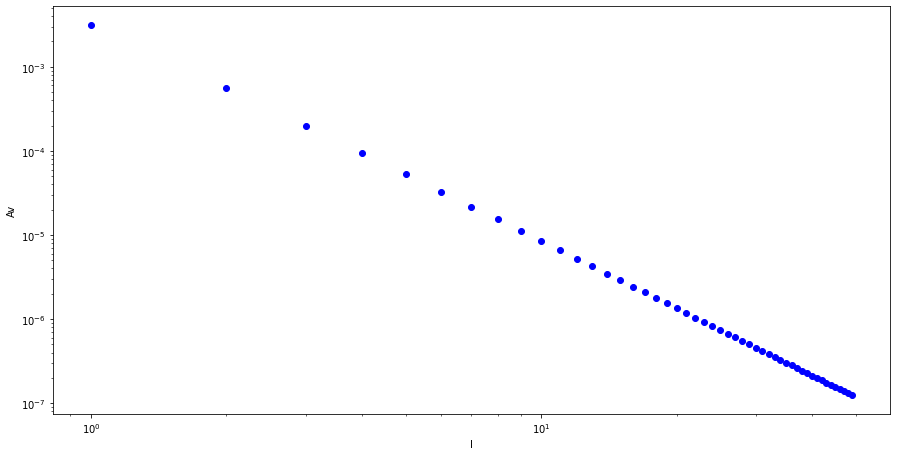

In [22]:
plt.xlabel("l")
plt.ylabel("Av")
plt.loglog(l/2, np.abs(y), 'o', color='blue')
plt.savefig("thing0.svg")
plt.show()

In [10]:
def W3x(jj1,jj2,jj3,jj4,jj5,jj6,jj7,jj8,jj9):
    xmin = np.max([np.abs(jj5-jj8),np.abs(jj9-jj6),np.abs(jj4-jj7)])
    xmax = np.min([jj5+jj8,jj9+jj6,jj4+jj7])
    
    xvals=np.arange(xmin,xmax,2)
    w3= lambda x:   (2*x+1)*np.power(-1,x)*wig.wig6jj(jj5,jj8,x, jj9,jj6,jj1)*wig.wig6jj(jj9,jj6,x, jj4,jj7,jj2)*wig.wig6jj(jj4,jj7,x, jj8,jj5,jj3)
    arrw3 = list(map(w3,xvals))
    return xvals,arrw3

In [11]:
ll = MAXSPIN
xvals,valueW3 = W3x(ll*jj1, ll*jj2,  ll*jj3, ll*jj4, ll*jj5, ll*jj6, ll*jj7, ll*jj8, ll*jj9)

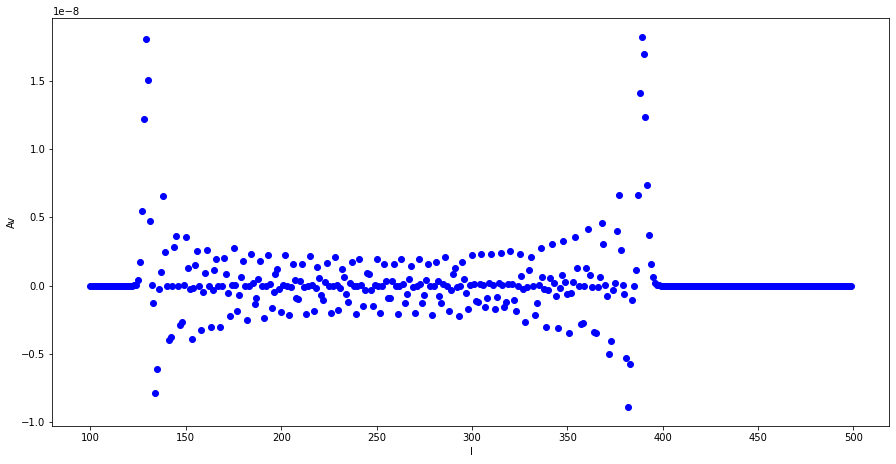

In [12]:
plt.xlabel("l")
plt.ylabel("Av")
plt.plot(xvals/2, valueW3, 'o', color='blue')
plt.savefig("thing1.svg")
plt.show()

In [13]:
psum=lambda x : sum(valueW3[0:x])/sum(valueW3)

In [14]:
test=np.array(list(map(psum,np.arange(0,len(xvals)))))

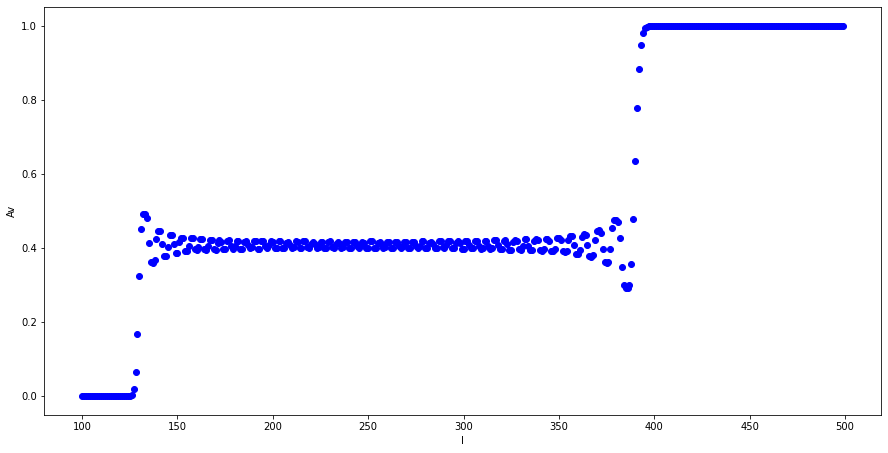

In [15]:
plt.xlabel("l")
plt.ylabel("Av")
plt.plot(xvals/2, test, 'o', color='blue')
plt.savefig("thing2.svg")
plt.show()